# `grid-ufunc` on CESM data

In [1]:
import xarray as xr
import numpy as np
from xgcm import Grid
import matplotlib.pyplot as plt
import pop_tools

In [2]:
from intake import open_catalog
url = "https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/CESM_POP.yaml"
cat = open_catalog(url)
ds  = cat["CESM_POP_hires_control"].to_dask()

In [3]:
ds

<xarray.Dataset>
Dimensions:             (nlat: 2400, nlon: 3600, time: 14965, z_t: 62, z_w: 62,
                         z_t_150m: 15, z_w_bot: 62, z_w_top: 62)
Coordinates: (12/59)
    ANGLE               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ANGLET              (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DXT                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DXU                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DYT                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DYU                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ...                  ...
    vonkar              float64 ...
  * z_t                 (z_t) float32 500.0 1.5e+03 ... 5.625e+05 5.875e+05
  * z_t_150m            (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                 (z_w) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_bot             (z_w_bot) float32 1e+03 2e+03 3e+03 ... 5.75e+05 6e+05
  * z_w_top             (z_w_top) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
Dimensions without coordinates: nlat, nlon
Data variables:
    HMXL_2              (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    SFWF_2              (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    SHF_2               (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    SSH_2               (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    SSS                 (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    SST                 (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    TAUX_2              (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    TAUY_2              (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    U1_1                (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    U2_2                (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    V1_1                (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    V2_2                (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
Attributes:
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    calendar:      All years have exactly  365 days.
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    contents:      Diagnostic and Prognostic Variables
    history:       none
    nsteps_total:  13088337
    revision:      $Id: tavg.F90 41939 2012-11-14 16:37:23Z mlevy@ucar.edu $
    source:        CCSM POP2, the CCSM Ocean Component
    start_time:    This dataset was created on 2013-03-09 at 12:25:55.7
    tavg_sum:      86399.99999999962
    title:         hybrid_v5_rel04_BC5_ne120_t12_pop62

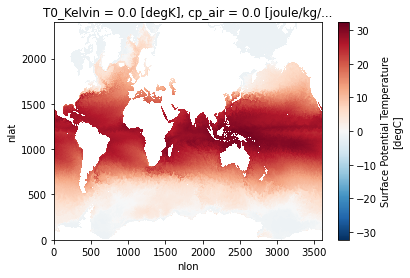

In [4]:
ds.SST[0].plot();

In [5]:
grid, ds_ren = pop_tools.to_xgcm_grid_dataset(ds, periodic=['X'])

In [6]:
ds_ren

<xarray.Dataset>
Dimensions:             (nlat_u: 2400, nlon_u: 3600, nlat_t: 2400,
                         nlon_t: 3600, time: 14965, z_t: 62, z_w_top: 62,
                         z_t_150m: 15, z_w_bot: 62)
Coordinates: (12/62)
    ANGLE               (nlat_u, nlon_u) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ANGLET              (nlat_t, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DXT                 (nlat_t, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DXU                 (nlat_u, nlon_u) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DYT                 (nlat_t, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DYU                 (nlat_u, nlon_u) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ...                  ...
  * z_w_top             (z_w_top) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_bot             (z_w_bot) float32 1e+03 2e+03 3e+03 ... 5.75e+05 6e+05
  * nlon_u              (nlon_u) int64 1 2 3 4 5 6 ... 3596 3597 3598 3599 3600
  * nlat_u              (nlat_u) int64 1 2 3 4 5 6 ... 2396 2397 2398 2399 2400
  * nlon_t              (nlon_t) float64 0.5 1.5 2.5 ... 3.598e+03 3.6e+03
  * nlat_t              (nlat_t) float64 0.5 1.5 2.5 ... 2.398e+03 2.4e+03
Data variables:
    HMXL_2              (time, nlat_t, nlon_t) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    SFWF_2              (time, nlat_t, nlon_t) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    SHF_2               (time, nlat_t, nlon_t) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    SSH_2               (time, nlat_t, nlon_t) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    SSS                 (time, nlat_t, nlon_t) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    SST                 (time, nlat_t, nlon_t) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    TAUX_2              (time, nlat_u, nlon_u) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    TAUY_2              (time, nlat_u, nlon_u) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    U1_1                (time, nlat_u, nlon_u) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    U2_2                (time, nlat_u, nlon_u) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    V1_1                (time, nlat_u, nlon_u) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    V2_2                (time, nlat_u, nlon_u) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
Attributes:
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    calendar:      All years have exactly  365 days.
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    contents:      Diagnostic and Prognostic Variables
    history:       none
    nsteps_total:  13088337
    revision:      $Id: tavg.F90 41939 2012-11-14 16:37:23Z mlevy@ucar.edu $
    source:        CCSM POP2, the CCSM Ocean Component
    start_time:    This dataset was created on 2013-03-09 at 12:25:55.7
    tavg_sum:      86399.99999999962
    title:         hybrid_v5_rel04_BC5_ne120_t12_pop62

In [7]:
grid

<xgcm.Grid>
Z Axis (not periodic, boundary=None):
  * center   z_t --> left
  * left     z_w_top --> center
  * right    z_w_bot --> center
X Axis (periodic, boundary=None):
  * center   nlon_t --> right
  * right    nlon_u --> center
Y Axis (not periodic, boundary=None):
  * center   nlat_t --> right
  * right    nlat_u --> center

## old way

In [8]:
def sst_grad_sq(da):
    da_diffx = grid.diff(da, 'X')
    da_diffy = grid.diff(da, 'Y', boundary='fill')
    da_diffx_interp = grid.interp(da_diffx, 'X')
    da_diffy_interp = grid.interp(da_diffy, 'Y', boundary='fill')
    dadx = da_diffx_interp/ds_ren.DXT
    dady = da_diffy_interp / ds_ren.DYT
    return dadx**2 + dady**2

In [9]:
q = sst_grad_sq(ds_ren.SST)
q

<xarray.DataArray (time: 14965, nlat_t: 2400, nlon_t: 3600)>
dask.array<add, shape=(14965, 2400, 3600), dtype=float64, chunksize=(1, 2398, 3598), chunktype=numpy.ndarray>
Coordinates: (12/42)
  * time                (time) object 0046-01-02 00:00:00 ... 0087-01-01 00:0...
  * nlat_t              (nlat_t) float64 0.5 1.5 2.5 ... 2.398e+03 2.4e+03
  * nlon_t              (nlon_t) float64 0.5 1.5 2.5 ... 3.598e+03 3.6e+03
    ANGLET              (nlat_t, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DXT                 (nlat_t, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DYT                 (nlat_t, nlon_t) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ...                  ...
    salt_to_ppt         float64 0.0
    sea_ice_salinity    float64 0.0
    sflux_factor        float64 0.0
    sound               float64 0.0
    stefan_boltzmann    float64 0.0
    vonkar              float64 0.0

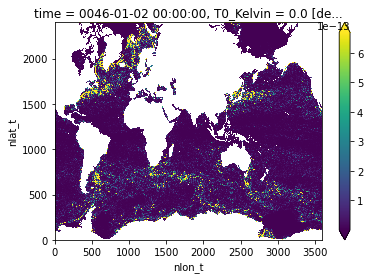

In [10]:
q[0].plot(robust=True);

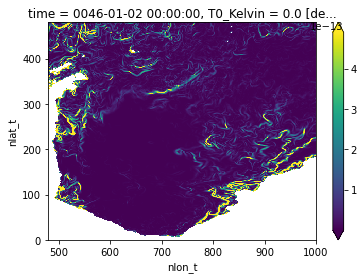

In [11]:
q[0, 0:480, 480:1000].plot(robust=True);

## `grid-ufunc` way

In [13]:
def diff_forward_1d(a):
    return a[..., 1:] - a[..., :-1]

In [18]:
def interp(a):
    return 0.5 * (a[..., :-1] + a[..., 1:])

In [15]:
def diff(arr, axis):
    """First order forward difference along any axis"""

    return np.apply_along_axis(diff_forward_1d, axis, arr)

In [20]:
signature = "(X:center, Y:center)->(X:center, Y:center)"

In [24]:
@as_grid_ufunc(signature=signature, boundary_width={'X': (1, 1), 'Y': (1, 1)}, boundary={"X": "periodic", "Y": "fill"}, fill_value=np.nan)
def abs_gradient_squared(a):
    a_diff_x = diff(a, axis=-2)
    a_diff_y = diff(a, axis=-1)
    a_diff_x_interp = interp(a_diff_x, axis=-2)
    a_diff_y_interp = interp(a_diff_y, axis=-1)
    dadx = a_diff_x_interp/ds_ren.DXT.values
    dady = a_diff_y_interp / ds_ren.DYT.values
    return dadx**2 + dady**2

In [26]:
abs_gradient_squared(ds.SST, axis=[("nlon_t", "nlat_t")])

ValueError: Number of entries in `axis` does not match the number of data arguments supplied

In [ ]:
as_grid_ufunc